<a href="https://colab.research.google.com/github/FaiazS/Breast_Cancer_Prediction/blob/main/BreastCancerPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#Loading Libraries

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras import models, layers

In [43]:
#Loading data

cancer_data = load_breast_cancer()

x_feature = cancer_data.data

y_label = cancer_data.target

In [44]:
#Splitting the data into Training and Testing data

x_train ,x_test, y_train, y_test = train_test_split(x_feature, y_label, test_size = 0.2, random_state = 42)

In [45]:
#Data Pre-Processing using Z-score Standardization

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [46]:
#Building the Model

cancer_prediction_model = models.Sequential([

                                             layers.Dense(64, activation = 'relu', input_shape = (x_train.shape[1],)),

                                             layers.Dense(32, activation = 'relu'),

                                             layers.Dense(1, activation = 'sigmoid')

                                             ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
#Compiling the Model

cancer_prediction_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [59]:
#Training the model

cancer_prediction_model.fit(x_train, y_train, epochs = 7, batch_size = 32, validation_data = (x_test,y_test))

history = cancer_prediction_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=32
)

Epoch 1/7
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9872 - loss: 0.0456 - val_accuracy: 0.9825 - val_loss: 0.0557
Epoch 2/7
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9932 - loss: 0.0289 - val_accuracy: 0.9825 - val_loss: 0.0567
Epoch 3/7
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9954 - loss: 0.0267 - val_accuracy: 0.9825 - val_loss: 0.0550
Epoch 4/7
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9940 - loss: 0.0356 - val_accuracy: 0.9825 - val_loss: 0.0587
Epoch 5/7
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9936 - loss: 0.0248 - val_accuracy: 0.9825 - val_loss: 0.0593
Epoch 6/7
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9904 - loss: 0.0391 - val_accuracy: 0.9825 - val_loss: 0.0613
Epoch 7/7
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9935 - loss: 0.0229 - val_accuracy: 0.9825 - val_loss: 0.0607
Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9975 - loss: 0.0243 - val_accuracy: 0.9825 - val_loss

In [63]:
#Evaluating the Model

test_loss, test_accuracy = cancer_prediction_model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9738 - loss: 0.0927 


In [64]:
print(test_loss)


0.07189061492681503


In [65]:
print(test_accuracy)

0.9736841917037964


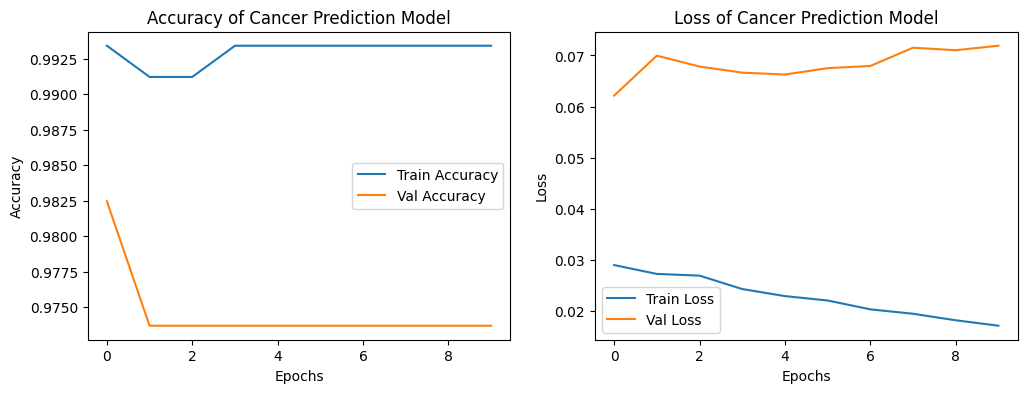

In [74]:
#Plotting Loss and Accuracy using Matplotlib

#Plotting Accuracy Chart

plt.figure(figsize = (12,4))

plt.subplot(1,2,1)

plt.plot(history.history['accuracy'], label = 'Train Accuracy')

plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.title('Accuracy of Cancer Prediction Model')


#Plotting Loss Chart

plt.subplot(1,2,2)

plt.plot(history.history['loss'], label = 'Train Loss')

plt.plot(history.history['val_loss'] , label = 'Val Loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.title('Loss of Cancer Prediction Model')

plt.show()